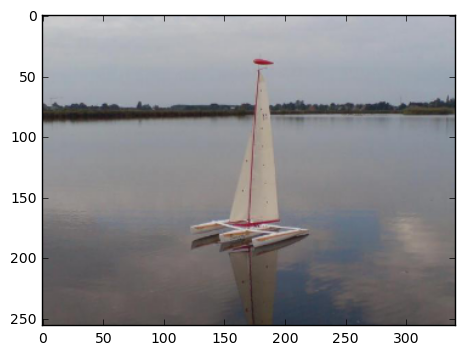

In [21]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import os

BATCH_SIZE = 10
VALSET_PATH ='/mnt/data1/imagenet-data/csv-files/val/imagenetdata6-300.csv'
os.environ["CUDA_VISIBLE_DEVICES"] = ""
sess = tf.InteractiveSession()

csv_path = tf.train.string_input_producer([VALSET_PATH], shuffle=True)
textReader = tf.TextLineReader()
_, csv_content = textReader.read(csv_path)
im_name, im_label = tf.decode_csv(csv_content, record_defaults=[[""], [1]])

im_content = tf.read_file(im_name)
train_image = tf.image.decode_jpeg(im_content, channels=3)
train_image = tf.cast(train_image, tf.float32)/255.

train_label = tf.cast(im_label, tf.int64)

def _compute_longer_edge(height, width, new_shorter_edge):
    return tf.cast(width*new_shorter_edge/height, tf.int32)

shape = tf.shape(train_image)
height = shape[0]
width = shape[1]
new_shorter_edge = tf.constant(256, dtype=tf.int32)

height_smaller_than_width = tf.less_equal(height, width)
new_height_and_width = tf.cond(
    height_smaller_than_width,
    lambda: (new_shorter_edge, _compute_longer_edge(height, width, new_shorter_edge)),
    lambda: (_compute_longer_edge(width, height, new_shorter_edge), new_shorter_edge)
)
size = tf.cast([new_height_and_width[0], new_height_and_width[1]], tf.int32)
image_ = tf.image.resize_images(train_image, size)
#image = tf.image.resize_bilinear(images, tf.pack(new_height_and_width))
image_ = tf.Print(image_, [tf.shape(image_), height, width, new_height_and_width[0], new_height_and_width[1]])
sess.run(tf.initialize_all_variables())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

res = sess.run(image_)
plt.imshow(res[:,:,:])

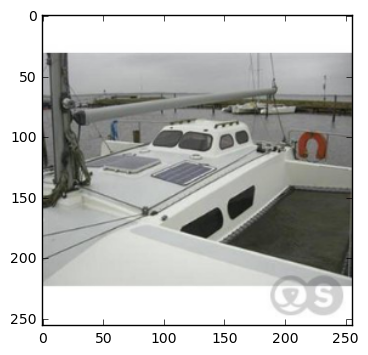

In [26]:
res = sess.run(image_)
plt.imshow(res[:,:,:])